In [17]:
import numpy as np
from enum import Enum

class Name(Enum):
    cube = 1
    cube_subsection = 2
    disney_cloud = 3
    cube_absorption = 4
    bunny_cloud_node_size = 5

name = Name.bunny_cloud_node_size

x_labels = [1, 2, 3, 5, 7, 10]

if name == Name.cube:
    y_labels = [0.01, 0.015, 0.02, 0.035, 0.05, 0.075, 0.1]
    default_path = "C:/Users/tsvdh/OneDrive/Documenten/thesis/results/cube_sizes/mse/mse_sizeY_depthX.txt"
    scalar = 1000
    rounding = 2
    plot_y_label = "size"
elif name == Name.cube_subsection:
    y_labels = [0.01, 0.015, 0.02, 0.035, 0.05, 0.075, 0.1]
    default_path = "C:/Users/tsvdh/OneDrive/Documenten/thesis/results/cube_sizes_subsection/mse/mse_sizeY_depthX.txt"
    scalar = 1000
    rounding = 2
    plot_y_label = "size"
elif name == Name.disney_cloud:
    y_labels = [0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
    default_path = "C:/Users/tsvdh/OneDrive/Documenten/thesis/results/disney_cloud_sizes/mse/mse_sizeY_depthX.txt"
    scalar = 1000
    rounding = 2
    plot_y_label = "size"
elif name == Name.cube_absorption:
    y_labels = [0.2, 0.5, 1]
    default_path = "C:/Users/tsvdh/OneDrive/Documenten/thesis/results/cube_absorption/mse/mse_absorptionY_depthX.txt"
    scalar = 1000
    rounding = 2
    plot_y_label = "absorption"
elif name == Name.bunny_cloud_node_size:
    y_labels = [1, 1.5, 2, 2.5, 3]
    default_path = "C:/Users/tsvdh/OneDrive/Documenten/thesis/results/bunny_cloud_node_sizes/mse/mse_node_sizeY_depthX.txt"
    scalar = 1000
    rounding = 2
    plot_y_label = "node size"
else:
    print(f"Invalid name: {name}")
    exit(0)

absolute_error = np.zeros((len(y_labels), len(x_labels)))
positive_error = np.zeros((len(y_labels), len(x_labels)))
negative_error = np.zeros((len(y_labels), len(x_labels)))

for x in range(len(x_labels)):
    for y in range(len(y_labels)):
        path = default_path.replace("Y", str(y_labels[y])).replace("X", str(x_labels[x]))

        with open(path) as file:
            absolute_error[y, x] = round(float(file.readline()) * scalar, rounding)
            positive_error[y, x] = round(float(file.readline()) * scalar, rounding)
            negative_error[y, x] = round(float(file.readline()) * scalar, rounding)

negative_error = np.absolute(negative_error)

print(absolute_error)
print(positive_error)
print(negative_error)

[[0.38 0.69 1.13 1.9  2.36 2.66]
 [0.38 0.66 1.06 1.63 1.88 1.88]
 [0.39 0.64 0.96 1.33 1.38 1.35]
 [0.41 0.63 0.9  1.19 1.3  1.5 ]
 [0.45 0.66 0.91 1.24 1.51 1.9 ]]
[[0.14 0.09 0.06 0.05 0.06 0.09]
 [0.17 0.1  0.07 0.07 0.09 0.17]
 [0.21 0.12 0.08 0.09 0.15 0.41]
 [0.26 0.14 0.1  0.14 0.3  0.74]
 [0.31 0.19 0.16 0.26 0.53 1.01]]
[[0.24 0.6  1.07 1.85 2.3  2.57]
 [0.2  0.56 0.99 1.57 1.79 1.71]
 [0.17 0.52 0.88 1.24 1.23 0.94]
 [0.16 0.49 0.8  1.05 0.99 0.77]
 [0.14 0.47 0.75 0.98 0.98 0.88]]


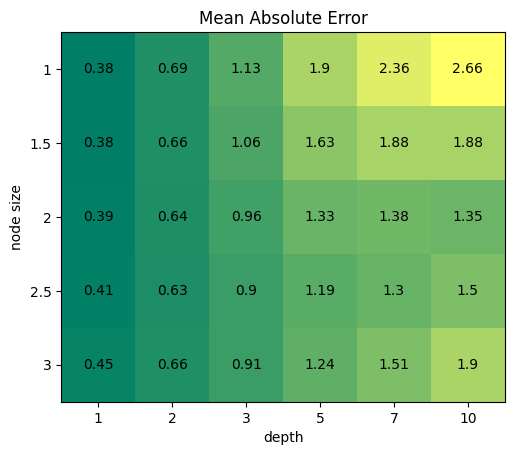

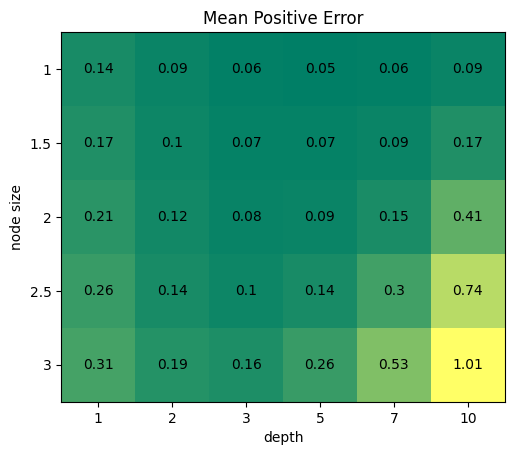

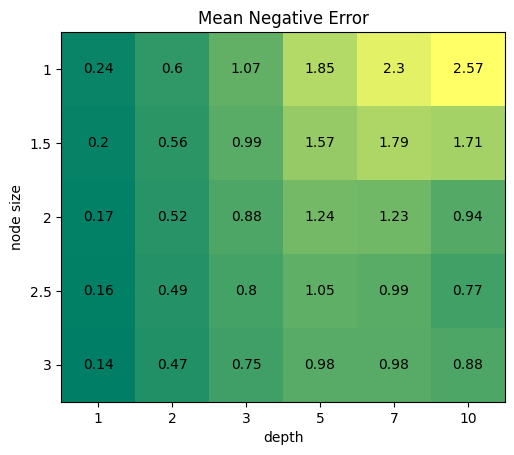

In [18]:
import matplotlib.pyplot as plt

for i, error in enumerate([absolute_error, positive_error, negative_error]):
    fig, ax = plt.subplots()
    im = ax.imshow(error, cmap="summer")

    plt.xlabel("depth")
    plt.ylabel(plot_y_label)

    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)

    for x in range(len(x_labels)):
        for y in range(len(y_labels)):
            ax.text(x, y, error[y, x], ha="center", va="center", color="black")

    if i == 0:
        errorType = "A"
        errorName = "Absolute"
    elif i == 1:
        errorType = "P"
        errorName = "Positive"
    else:
        errorType = "N"
        errorName = "Negative"

    ax.set_title(f"Mean {errorName} Error")
    plt.savefig(f"{name.name}_M{errorType}E.pdf", bbox_inches="tight")
    plt.savefig(f"{name.name}_M{errorType}E.png", bbox_inches="tight")